<center><img src="https://i.imgur.com/zRrFdsf.png" width="700"></center>

<a target="_blank" href="https://colab.research.google.com/github/CienciaDeDatosEspacial/TheThematics/blob/main/index.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# The Thematic map

Last session we created a file with several layers:

In [126]:
import geopandas as gpd

linkGit='https://github.com/a20225792-ux/tareaaa/raw/refs/heads/main/'
linkWorldMaps='worldMaps.gpkg'

we can easily find out the layers in that geopackage file (**worldMaps.gpkg**):

In [127]:
gpd.list_layers(linkGit+linkWorldMaps)

,name,geometry_type
0,rivers,MultiLineString
1,cities,Point
2,countries,MultiPolygon


For the thematics we will retrieve only one layer (map):

In [128]:
countries=gpd.read_file(linkGit+linkWorldMaps,layer='countries')

# see some
countries

,COUNTRY,geometry
0,Aruba (Netherlands),"MULTIPOLYGON (((-69.88223 12.41111, -69.94695 ..."
1,Antigua and Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ..."
2,Afghanistan,"MULTIPOLYGON (((61.27656 35.60725, 61.29638 35..."
3,Algeria,"MULTIPOLYGON (((-5.15213 30.18047, -5.13917 30..."
4,Azerbaijan,"MULTIPOLYGON (((46.54037 38.87559, 46.49554 38..."
...,...,...
247,South Sudan,"MULTIPOLYGON (((34.21807 9.96458, 34.20722 9.9..."
248,Indonesia,"MULTIPOLYGON (((123.21846 -10.80917, 123.19832..."
249,East Timor,"MULTIPOLYGON (((124.41824 -9.3001, 124.40446 -..."
250,Curacao (Netherlands),"MULTIPOLYGON (((-68.96556 12.19889, -68.91196 ..."


As you see, the GDF above has just two colums; enough to plot a map, but no more than that.

Let me open a DF:

In [129]:
import pandas as pd

someDataLink='Alcohol%20consumption%20per%20capita.csv'

someData=pd.read_csv(linkGit+someDataLink)

## data available
someData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   name                     189 non-null    object 
 1   slug                     189 non-null    object 
 2    liters of pure alcohol  189 non-null    float64
 3   date_of_information      189 non-null    int64  
 4   ranking                  189 non-null    int64  
 5   region                   189 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 9.0+ KB


## Pre Processing: Merging

The DF has some interesting numerical data (_float64_):
* fragility: fragility index 2023 -[details here](https://fragilestatesindex.org/2023/06/14/fragile-states-index-2023-annual-report/)
* co2: metric tonnes of CO2 emmitted -[details here](https://www.cia.gov/the-world-factbook/field/carbon-dioxide-emissions/country-comparison/)
* sq_km: country area -[details here](https://www.cia.gov/the-world-factbook/field/area/country-comparison/)
* num_airports: count of airports in the country -[details here](https://www.cia.gov/the-world-factbook/field/airports/country-comparison/)
* population: country population  -[details here](https://www.cia.gov/the-world-factbook/field/population/country-comparison/)
* mobiles: total number of mobile cellular telephone subscribers -[details here](https://www.cia.gov/the-world-factbook/field/telephones-mobile-cellular/country-comparison/)

There are also other columns that may be of help:

Preparing thematic maps requires **social data** _about_ the geometry (line, polygon, point). The object **countries** has no social data, so the preprocessing requires geomerging.

In [130]:
someData.head()

,name,slug,liters of pure alcohol,date_of_information,ranking,region
0,Cook Islands,cook-islands,12.97,2019,1,Australia and Oceania
1,Latvia,latvia,12.90,2019,2,Europe
2,Czechia,czechia,12.73,2019,3,Europe
3,Lithuania,lithuania,11.93,2019,4,Europe
4,Austria,austria,11.90,2019,5,Europe


### Geo Merging

This is a critical preprocessing operation, as it is in charge of combining data sets, in this case combine a DF into a GDF. Some rules are needed:

* There is at least one common column needed to serve for the matches.
* The common columns, or KEYs, need contents to be written exactly in both columns.
* It is recommended that both KEYs are named the same.

Here we have the KEYs:

In [131]:
countries.COUNTRY.head()

,COUNTRY
0,Aruba (Netherlands)
1,Antigua and Barbuda
2,Afghanistan
3,Algeria
4,Azerbaijan


In [132]:
someData.name.head()

,name
0,Cook Islands
1,Latvia
2,Czechia
3,Lithuania
4,Austria


Let's solve the _country name_ differences for the KEYs:

In [133]:
countries.rename(columns={'COUNTRY':'name'},inplace=True)

We can notice the different *case* in the KEYs. Let's work with uppercases:

In [134]:
countries['name']=countries.name.str.upper()

It is very unlikely the names are written the same. Let's verify:

In [135]:
onlyDF=set(someData.name)- set(countries.name)
onlyGDF=set(countries.name)- set(someData.name)

Check here:

In [136]:
onlyDF # they did not find a match in the MAP GDF!

{'Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas, The',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo, Democratic Republic of the',
 'Congo, Republic of the',
 'Cook Islands',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia, The',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 '

There are several countries in the DF that did not find a match in the GDF (map). Of course, most of them are in the map, let's see why they were not matched.

### Fuzzy merging

We use this technique to detect similarities between strings. You need this package **thefuzz** (based on the [Levenshtein algorithm](https://en.wikipedia.org/wiki/Levenshtein_distance)):

In [137]:
 !pip install thefuzz

This is the basic idea:

In [138]:
from thefuzz.process import extractOne as best

## find the BEST match to 'BAHAMAS (THE)'
## from all strings in 'onlyGDF'

best('BAHAMAS (THE)',onlyGDF)

('BAHAMAS', 90)

As you see, you get a coefficient value of 90 (the closer to 100 the better). That may be a reliable result.

Let's do the same for all the unmatched countries:

In [139]:
## for each country in onlyDF, find the BEST match in onlyGDF

[(name, best(name,onlyGDF)) for name in onlyDF]

[('Grenada', ('GRENADA', 100)),
 ('Lesotho', ('LESOTHO', 100)),
 ('Congo, Republic of the', ('DEMOCRATIC REPUBLIC OF THE CONGO', 95)),
 ('Mongolia', ('MONGOLIA', 100)),
 ('Nauru', ('NAURU', 100)),
 ('Namibia', ('NAMIBIA', 100)),
 ('Timor-Leste', ('EAST TIMOR', 81)),
 ('Barbados', ('BARBADOS', 100)),
 ('El Salvador', ('EL SALVADOR', 100)),
 ('Angola', ('ANGOLA', 100)),
 ('Mali', ('MALI', 100)),
 ('Germany', ('GERMANY', 100)),
 ('Italy', ('ITALY', 100)),
 ('Burkina Faso', ('BURKINA FASO', 100)),
 ('Trinidad and Tobago', ('TRINIDAD AND TOBAGO', 100)),
 ('Bahamas, The', ('BAHAMAS', 90)),
 ('Russia', ('RUSSIA', 100)),
 ('Cook Islands', ('COOK ISLANDS (NEW ZEALAND)', 90)),
 ('Slovakia', ('SLOVAKIA', 100)),
 ('Vietnam', ('VIETNAM', 100)),
 ('Ireland', ('IRELAND', 100)),
 ('Zambia', ('ZAMBIA', 100)),
 ('Serbia', ('SERBIA', 100)),
 ('Zimbabwe', ('ZIMBABWE', 100)),
 ('Ghana', ('GHANA', 100)),
 ('Botswana', ('BOTSWANA', 100)),
 ('Ukraine', ('UKRAINE', 100)),
 ('Andorra', ('ANDORRA', 100)),
 ('Sam

Each element in the *list* above in in parentheses, for instance:

```
('TIMOR-LESTE', ('EAST TIMOR', 81))
```

That element has two elements:


*   **'TIMOR-LESTE'** from *onlyDF*, and
*   **('EAST TIMOR', 81)** which is the result from _best(country,onlyGDF)_. This last element, as we just saw above, shows the best match and the level of similarity (the higher the more similar).

We can prepare a list where each element has three elements:



In [140]:
#or
[(name, best(name,onlyGDF)[0],best(name,onlyGDF)[1]) for name in onlyDF]

[('Grenada', 'GRENADA', 100),
 ('Lesotho', 'LESOTHO', 100),
 ('Congo, Republic of the', 'DEMOCRATIC REPUBLIC OF THE CONGO', 95),
 ('Mongolia', 'MONGOLIA', 100),
 ('Nauru', 'NAURU', 100),
 ('Namibia', 'NAMIBIA', 100),
 ('Timor-Leste', 'EAST TIMOR', 81),
 ('Barbados', 'BARBADOS', 100),
 ('El Salvador', 'EL SALVADOR', 100),
 ('Angola', 'ANGOLA', 100),
 ('Mali', 'MALI', 100),
 ('Germany', 'GERMANY', 100),
 ('Italy', 'ITALY', 100),
 ('Burkina Faso', 'BURKINA FASO', 100),
 ('Trinidad and Tobago', 'TRINIDAD AND TOBAGO', 100),
 ('Bahamas, The', 'BAHAMAS', 90),
 ('Russia', 'RUSSIA', 100),
 ('Cook Islands', 'COOK ISLANDS (NEW ZEALAND)', 90),
 ('Slovakia', 'SLOVAKIA', 100),
 ('Vietnam', 'VIETNAM', 100),
 ('Ireland', 'IRELAND', 100),
 ('Zambia', 'ZAMBIA', 100),
 ('Serbia', 'SERBIA', 100),
 ('Zimbabwe', 'ZIMBABWE', 100),
 ('Ghana', 'GHANA', 100),
 ('Botswana', 'BOTSWANA', 100),
 ('Ukraine', 'UKRAINE', 100),
 ('Andorra', 'ANDORRA', 100),
 ('Samoa', 'WESTERN SAMOA', 90),
 ('Sao Tome and Principe', 'S

For instace, this element has 3 elements:

```
 ('IRAN (ISLAMIC REPUBLIC OF)', 'IRAN', 90)
```

The level of similarity would guide us to make update (replace) the strings in one of the KEYs, so that the merging process works properly.

Then, it would be better if we have a data frame instead of a list:

In [141]:
pd.DataFrame([(name, best(name,onlyGDF)[0],best(name,onlyGDF)[1]) for name in onlyDF])

,0,1,2
0,Grenada,GRENADA,100
1,Lesotho,LESOTHO,100
2,"Congo, Republic of the",DEMOCRATIC REPUBLIC OF THE CONGO,95
3,Mongolia,MONGOLIA,100
4,Nauru,NAURU,100
...,...,...,...
184,Paraguay,PARAGUAY,100
185,Cyprus,CYPRUS,100
186,Bosnia and Herzegovina,BOSNIA AND HERZEGOVINA,100
187,Nigeria,NIGERIA,100


Let's sort by the column '2' (the third):

In [142]:
pd.DataFrame([(country, best(country,onlyGDF)[0],best(country,onlyGDF)[1]) for country in onlyDF]).sort_values(by=2)

,0,1,2
85,Cote d'Ivoire,IVORY COAST,63
36,Burma,BURKINA FASO,68
143,Eswatini,INDIA,68
112,Czechia,CZECH REPUBLIC,75
153,Cabo Verde,CAPE VERDE,80
...,...,...,...
184,Paraguay,PARAGUAY,100
185,Cyprus,CYPRUS,100
186,Bosnia and Herzegovina,BOSNIA AND HERZEGOVINA,100
187,Nigeria,NIGERIA,100


The previous result helps make a plan based on these cases:
* **ESWATINI** is always a problem, because it is also *SWAZILAND*.
* **KOREA (THE REPUBLIC OF)** is not _NORTH KOREA_.
* **LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE)** is too long to match *LAOS* (if it exists in the map like that).
* **SAMOA** is always a problem, because it is also *WESTERN SAMOA*.

Based on this, we should see what our GDF has:

In [143]:
countries.name[countries.name.str.contains('SWAZ|LAO|SAMOA|KORE')]

,name
9,AMERICAN SAMOA (US)
120,NORTH KOREA
122,SOUTH KOREA
126,LAOS
242,WESTERN SAMOA
243,SWAZILAND


Then, it makes sense to change those manually (notice the 'replace' uses Python dictionaries):

In [144]:
# this is a {dictionary}

manualChanges={'SWAZILAND':'ESWATINI',
               'LAOS':"LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE)",
               'SOUTH KOREA':'KOREA (THE REPUBLIC OF)',
               'WESTERN SAMOA':'SAMOA',
              }

countries.replace(to_replace={'Country':manualChanges},inplace=True)

At this stage, we should recompute the differences:

In [145]:
# updating
onlyDF=set(someData.name)- set(countries.name)
onlyGDF=set(countries.name)- set(someData.name)

An re run this code:

In [146]:
# keeping high scores

pd.DataFrame([(name, best(name,onlyGDF)[0],best(name,onlyGDF)[1]) for name in onlyDF]).sort_values(2)

,0,1,2
85,Cote d'Ivoire,IVORY COAST,63
36,Burma,BURKINA FASO,68
143,Eswatini,INDIA,68
112,Czechia,CZECH REPUBLIC,75
153,Cabo Verde,CAPE VERDE,80
...,...,...,...
184,Paraguay,PARAGUAY,100
185,Cyprus,CYPRUS,100
186,Bosnia and Herzegovina,BOSNIA AND HERZEGOVINA,100
187,Nigeria,NIGERIA,100


All this is correct now!

Let's prepare the changes:

In [147]:
# new {dictionary}
changesToDF={name: best(name,onlyGDF)[0] for name in onlyDF}
changesToDF

{'Grenada': 'GRENADA',
 'Lesotho': 'LESOTHO',
 'Congo, Republic of the': 'DEMOCRATIC REPUBLIC OF THE CONGO',
 'Mongolia': 'MONGOLIA',
 'Nauru': 'NAURU',
 'Namibia': 'NAMIBIA',
 'Timor-Leste': 'EAST TIMOR',
 'Barbados': 'BARBADOS',
 'El Salvador': 'EL SALVADOR',
 'Angola': 'ANGOLA',
 'Mali': 'MALI',
 'Germany': 'GERMANY',
 'Italy': 'ITALY',
 'Burkina Faso': 'BURKINA FASO',
 'Trinidad and Tobago': 'TRINIDAD AND TOBAGO',
 'Bahamas, The': 'BAHAMAS',
 'Russia': 'RUSSIA',
 'Cook Islands': 'COOK ISLANDS (NEW ZEALAND)',
 'Slovakia': 'SLOVAKIA',
 'Vietnam': 'VIETNAM',
 'Ireland': 'IRELAND',
 'Zambia': 'ZAMBIA',
 'Serbia': 'SERBIA',
 'Zimbabwe': 'ZIMBABWE',
 'Ghana': 'GHANA',
 'Botswana': 'BOTSWANA',
 'Ukraine': 'UKRAINE',
 'Andorra': 'ANDORRA',
 'Samoa': 'WESTERN SAMOA',
 'Sao Tome and Principe': 'SAO TOME AND PRINCIPE',
 'New Zealand': 'NEW ZEALAND',
 'Austria': 'AUSTRIA',
 'Suriname': 'SURINAME',
 'Brunei': 'BRUNEI',
 'Peru': 'PERU',
 'Somalia': 'SOMALIA',
 'Burma': 'BURKINA FASO',
 'Equatori

In [148]:
someData.replace(to_replace={'name':changesToDF},inplace=True)

What is left to match?

In [149]:
# updating
onlyDF=set(someData.name)- set(countries.name)
onlyGDF=set(countries.name)- set(someData.name)
[(country, best(country,onlyGDF)) for country in onlyDF]

[]

Once you are here, merging can proceed:

In [150]:
## GDF to the 'left'
theMapAndData=countries.merge(someData, on='name')

And our GDF has social data now!

In [151]:
theMapAndData.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   name                     189 non-null    object  
 1   geometry                 189 non-null    geometry
 2   slug                     189 non-null    object  
 3    liters of pure alcohol  189 non-null    float64 
 4   date_of_information      189 non-null    int64   
 5   ranking                  189 non-null    int64   
 6   region                   189 non-null    object  
dtypes: float64(1), geometry(1), int64(2), object(3)
memory usage: 10.5+ KB


We should save this map of countries and their indicators in a new file:

In [152]:
theMapAndData.to_file("worldindicators.json")

# Thematics: the DDM (Dot Density Map)

You have a DDM if you use dot to show comparatively which polygon of a map has 'more' (or 'less') of some countable phenomenon of interest.
A dot is an aggregated value, but it is constant for each dot.

We have the world map, let's keep Africa:

In [153]:
theMapAndData.region.value_counts()

,count
region,
Africa,53
Europe,40
Central America and the Caribbean,20
East and Southeast Asia,17
Middle East,14
Australia and Oceania,13
South America,12
Central Asia,9
South Asia,8


### Preprocessing: Filtering

<Axes: >

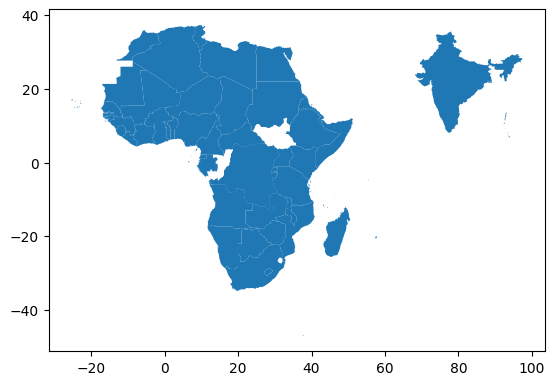

In [154]:
# then

Africa=theMapAndData[theMapAndData.region=='Africa']
Africa.plot()

A DDM can serve as an effective way to show the distribution of people. The most critical tasks are:

* Dot Placement: The dots should be randomly distributed within each polygon to avoid misrepresenting the data.

* Dot Unit: Deciding how many people each dot should represent is key for visual clarity. This value should be chosen carefully to avoid oversaturation or sparsity.

The size of all dots on the map must be the same to ensure a consistent visual comparison.

### Preprocessing: aggregating

This is a DOT UNIT proposal:

In [155]:
justDots=Africa.copy()
dot_value = 1
justDots['num_dots'] = (justDots[' liters of pure alcohol'] / dot_value).astype(int)

### Preprocessing: distributing dots

And here, we get a location for the dots:

In [156]:
# 2. Generate the random dot locations using .sample_points()
justDots = justDots.sample_points(size=justDots['num_dots']).explode(index_parts=True)

You get this:

In [157]:
justDots

7    0     POINT (12.62385 -6.71333)
     1     POINT (16.15132 -7.26593)
     2    POINT (16.44749 -15.96581)
     3        POINT (16.9708 -9.927)
     4    POINT (19.58728 -16.77381)
                     ...            
185  1    POINT (25.78213 -16.33298)
     2    POINT (30.48295 -13.30122)
186  0    POINT (26.13307 -18.37427)
     1    POINT (29.30693 -19.05897)
     2     POINT (31.3971 -19.02924)
Name: sampled_points, Length: 132, dtype: geometry

In [158]:
# what is it?
type(justDots)

geopandas.geoseries.GeoSeries

### Preprocessing: building GDF from GS

Notice the multi index (MI), one for a country and for a dot. As we are planing to send these points to R, we avoid MI:

In [159]:
justDots.reset_index(drop=True, inplace=True)
Africa_dots=gpd.GeoDataFrame(geometry=justDots)
Africa_dots

,geometry
0,POINT (12.62385 -6.71333)
1,POINT (16.15132 -7.26593)
2,POINT (16.44749 -15.96581)
3,POINT (16.9708 -9.927)
4,POINT (19.58728 -16.77381)
...,...
127,POINT (25.78213 -16.33298)
128,POINT (30.48295 -13.30122)
129,POINT (26.13307 -18.37427)
130,POINT (29.30693 -19.05897)


Now you have a GDF:

In [160]:
Africa_dots.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   geometry  132 non-null    geometry
dtypes: geometry(1)
memory usage: 1.2 KB


Juts plot the polygons as the base, and the points as the layer on top!

<Axes: >

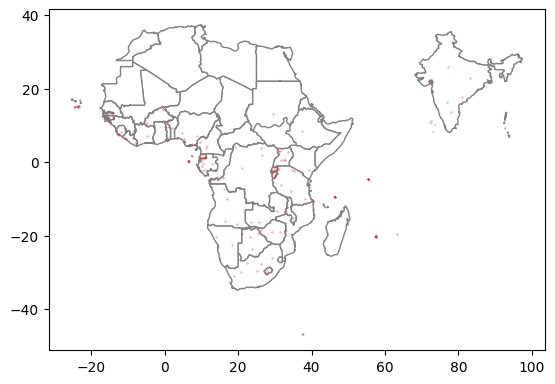

In [161]:
base=Africa.plot(facecolor="white",#color of polygon fill
               edgecolor='grey') #color of border
Africa_dots.plot(markersize=0.05, color='red',ax=base)

It is generally recommended that DDMs use an **equal-area projection**, which benefits density and limits area distortion.

<Axes: >

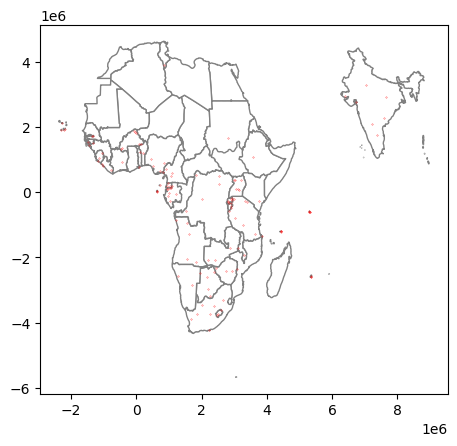

In [162]:
base=Africa.to_crs(8857).plot(facecolor="white",
                              edgecolor='grey')
Africa_dots.to_crs(8857).plot(markersize=0.05, color='red',ax=base)

Let's keep the continent countries with that crs:

In [163]:
Africa_8857=Africa.to_crs(8857)
Africa_dots_8857=Africa_dots.to_crs(8857)

# Thematics: the PSM (Proportional Symbol Map)

You have a PSM if you use a symbol (generally a circle) to show the distribution of a variable per location.
The symbol is an aggregated raw value, and its size varies according to those values. So now we need:

### Preprocessing: GDF of centroids

1. A location for a symbol, generally the polygon centroid.

In [164]:
Africa_8857_centroids = Africa_8857.copy()

# Africa_8857_centroids will have a new geometry:
Africa_8857_centroids['geometry'] = Africa_8857_centroids['geometry'].centroid

2. A size of varying values (not constant as in DDMs). Let's use population again.

In [165]:
Africa_8857_centroids['size'] = Africa_8857_centroids[' liters of pure alcohol'].apply(lambda x: x**0.5/100)

## or
# import numpy as np
# Africa_8857_centroids['size'] = Africa_8857_centroids['population'].apply(lambda x: np.log10(x))

We got the basics, then:

<Axes: >

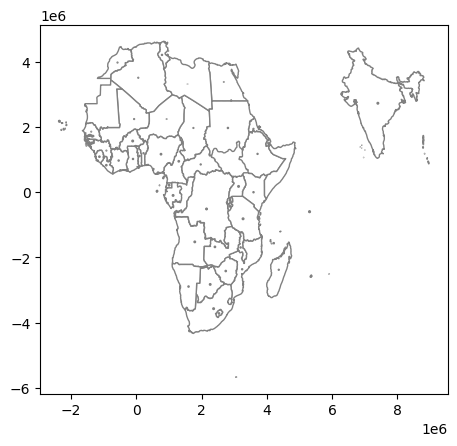

In [197]:
base=Africa_8857.plot(facecolor="white",
                      edgecolor='grey')
# Plot the centroids on top
Africa_8857_centroids.plot(
    ax=base,
    markersize=Africa_8857_centroids['size']*50,
    color='grey'
)

Keep in mind that the standard way of computing centroids may bring some trouble. Let´s plot Seychelles:

In [167]:
!pip install mapclassify

In [168]:
base=Africa_8857[Africa_8857.name=="SEYCHELLES"].explore()
Africa_8857_centroids[Africa_8857_centroids.name=="SEYCHELLES"].explore(m=base,color="red")

A good alternative to centroids is representative_point() when dealing with complex multipolygons.

In [169]:
# replace the points
Africa_8857_centroids["geometry"]=Africa_8857.representative_point()

We will keep that last result.

In [170]:
base=Africa_8857[Africa_8857.name=="SEYCHELLES"].explore()
Africa_8857_centroids[Africa_8857_centroids.name=="SEYCHELLES"].explore(m=base,color="red")

### Preprocessing: Computing new columns

PPMs are not thematic maps to see precise values, but to reveal clear differences on the variable distribution used. As, human eyes are very limited to detect area differences, we may need to use some other tactics to help uncover some patterns.

For example, let's confirm if we have outliers:

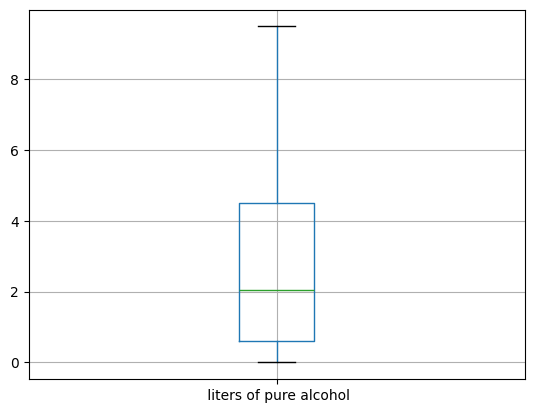

In [171]:
boxplotInfo=Africa_8857_centroids.boxplot(column=' liters of pure alcohol',return_type="dict")

The object **boxplotInfo** showed the boxplot, and we confirm there are outliers. We can recover them like this:

In [172]:
outliers=boxplotInfo['fliers'][0].get_ydata()
## see
outliers

array([], dtype=object)

Then, these are the outlying countries:

In [173]:
Africa_8857_centroids[Africa_8857_centroids[' liters of pure alcohol'].isin(outliers)]

,name,geometry,slug,liters of pure alcohol,date_of_information,ranking,region,size


Knowing this information, we can create a column as outlier flag:

In [174]:
Africa_8857_centroids[' liters of pure alcohol_outlier'] = Africa_8857_centroids[' liters of pure alcohol'].isin(outliers)*1

## see
Africa_8857_centroids

,name,geometry,slug,liters of pure alcohol,date_of_information,ranking,region,size,liters of pure alcohol_outlier
2,ALGERIA,POINT (58149.408 3504624.452),algeria,0.59,2019,160,Africa,0.007681,0
7,ANGOLA,POINT (1789934.856 -1524650.389),angola,5.84,2019,73,Africa,0.024166,0
13,BOTSWANA,POINT (2262432.346 -2828174.988),botswana,5.98,2019,71,Africa,0.024454,0
20,BENIN,POINT (219186.939 1191134.38),benin,1.25,2019,145,Africa,0.011180,0
27,BURUNDI,POINT (2865100.606 -433659.14),burundi,4.07,2019,95,Africa,0.020174,0
30,CHAD,POINT (1747642.958 1965809.757),chad,0.55,2019,162,Africa,0.007416,0
32,DEMOCRATIC REPUBLIC OF THE CONGO,POINT (2150454.367 -516111.79),congo-republic-of-the,5.74,2019,75,Africa,0.023958,0
33,DEMOCRATIC REPUBLIC OF THE CONGO,POINT (2150454.367 -516111.79),congo-democratic-republic-of-the,0.56,2019,161,Africa,0.007483,0
36,CAMEROON,POINT (1299556.828 944934.755),cameroon,4.09,2019,94,Africa,0.020224,0
37,COMOROS,POINT (4208450.609 -1564478.31),comoros,0.18,2019,173,Africa,0.004243,0


We can use that like this:

<Axes: >

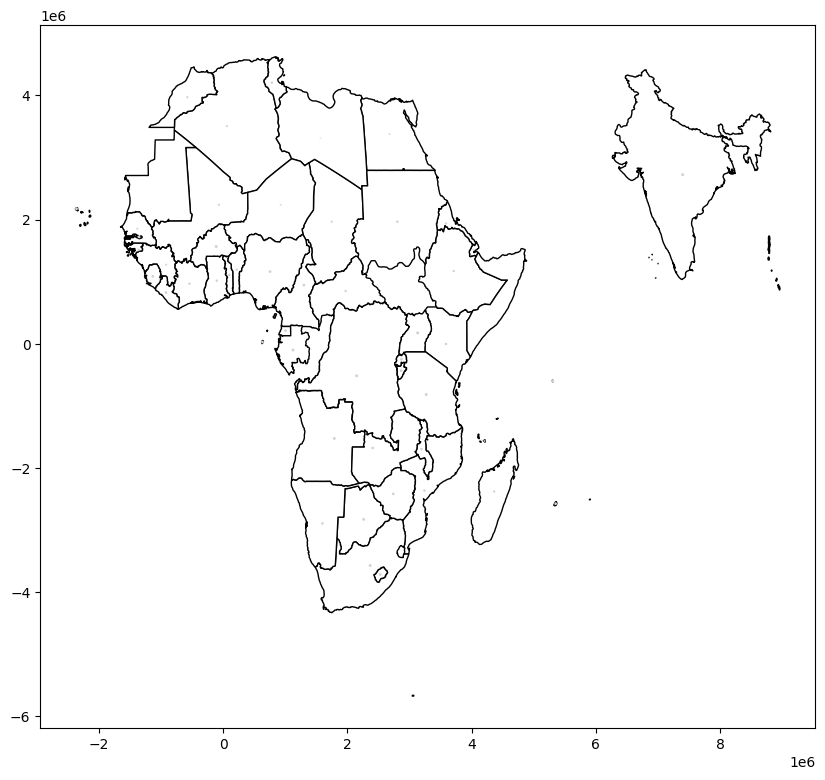

In [199]:
base = Africa_8857.plot(color='white', edgecolor='black', figsize=(10,10))

# Define your color map
mapcolor = {1: 'black', 0: 'lightgrey'}

# Plot the centroids on top
Africa_8857_centroids.plot(
    ax=base,
    markersize=Africa_8857_centroids['size']*50,
    c=Africa_8857_centroids[' liters of pure alcohol_outlier'].map(mapcolor)
)

Here, we do a good job for outliers, but it is difficult to interprete the other ones. We could use some redundancy, but more work is needed:
1. Create two maps of centroids:

In [176]:
# Create explicit copies of the DataFrames
Africa_8857_centroids_out = Africa_8857_centroids[Africa_8857_centroids[' liters of pure alcohol_outlier']==1].copy()
Africa_8857_centroids_no_out = Africa_8857_centroids[Africa_8857_centroids[' liters of pure alcohol_outlier']==0].copy()

2. Compute sizes in each:

In [177]:
Africa_8857_centroids_out['size'] = Africa_8857_centroids_out[' liters of pure alcohol'].apply(lambda x: x**0.5 / 50)
Africa_8857_centroids_no_out['size'] = Africa_8857_centroids_no_out[' liters of pure alcohol'].apply(lambda x: x**0.5 / 50)

Now, plot the three layers, using some color gradient for the non-outliers:

/tmp/ipython-input-2750486492.py:10: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  Africa_8857_centroids_out.plot(


<Axes: >

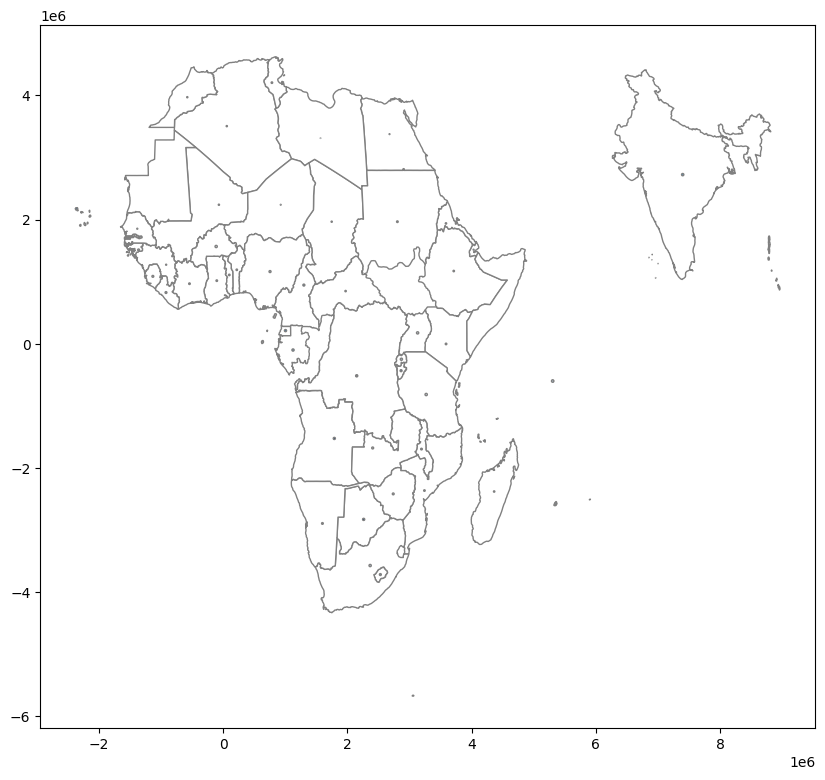

In [201]:
base=Africa_8857.plot(color='white', edgecolor='grey',figsize=(10,10))

Africa_8857_centroids_no_out.plot(
    ax=base,
    markersize=Africa_8857_centroids_no_out['size']*50,
    edgecolor='grey',
    c=Africa_8857_centroids_no_out['size']*50,
    cmap='Blues_r'
)
Africa_8857_centroids_out.plot(
    ax=base,
    markersize=Africa_8857_centroids_out['size']*50,
    color='orange'
)

# Thematics: Choropleths

Notice that the DDMs may use aggregated counts, and the PSMs use the variables in its original form. Choropleths will 'paint' the whole polygon and as noticed in PSMs, we have to be very careful when using color in shape, as the area itself is a confounding. To control this visual artifact, the variable must be normalized, that is, divided by a value correlated with the area.

Then, for this course, a choropleth is a normalized representation of data.

Following our definition:

* This is **NOT** a choropleth:


<Axes: >

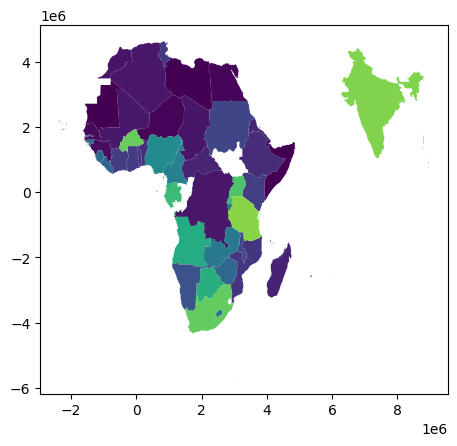

In [179]:
Africa_8857.plot(Africa_8857[' liters of pure alcohol'])

* This **IS** a choropleth:

<Axes: >

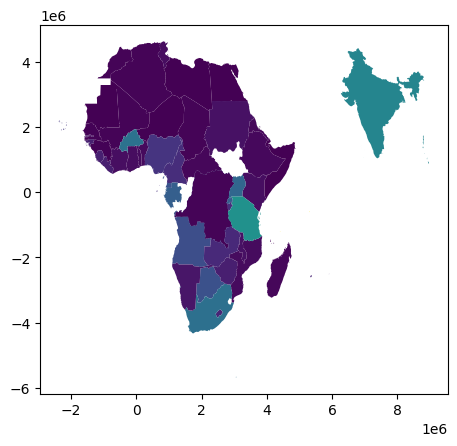

In [180]:
Africa_8857.plot(Africa_8857[' liters of pure alcohol']/Africa_8857['ranking'])

Choropleths are great to represent normalized indicators such as:
* Densities
* Ratios
* Rates
* Averages

Population by area is a density indicator. This is a real number (not an integer), so most of the time the color gradient might  not be
that useful to reveal some pattern visually. Then, we often discretize (or bin) the indicator computed.

### Preprocessing: Discretizing

Now, we want to cut the variable. Run the next code to make sure you have tose packages:

In [181]:
## do you have these installed?
! pip show numba mapclassify numpy

Name: numba
Version: 0.60.0
Summary: compiling Python code using LLVM
Home-page: https://numba.pydata.org
Author: 
Author-email: 
License: BSD
Location: /usr/local/lib/python3.12/dist-packages
Requires: llvmlite, numpy
Required-by: cudf-cu12, cuml-cu12, dask-cuda, distributed-ucxx-cu12, librosa, numba-cuda, pynndescent, shap, stumpy, umap-learn
---
Name: mapclassify
Version: 2.10.0
Summary: Classification Schemes for Choropleth Maps.
Home-page: 
Author: 
Author-email: 
License: BSD 3-Clause
Location: /usr/local/lib/python3.12/dist-packages
Requires: networkx, numpy, pandas, scikit-learn, scipy
Required-by: 
---
Name: numpy
Version: 2.0.2
Summary: Fundamental package for array computing in Python
Home-page: https://numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: Copyright (c) 2005-2024, NumPy Developers.
All rights reserved.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are
met:


We will discretize this:

In [182]:
Africa_8857['liters_pure_alcohol_ranking']=Africa_8857[' liters of pure alcohol']/Africa_8857['ranking']

Let's explore the bining algorithms:

In [183]:
import mapclassify
import numpy as np

np.random.seed(12345) # so we all get the same results!

# let's try 5 intervals
K=5
theVar=Africa_8857['liters_pure_alcohol_ranking']
# same interval width, easy interpretation
ei5 = mapclassify.EqualInterval(theVar, k=K)
# same interval width based on standard deviation, easy - but not as the previous one, poor when high skewness
msd = mapclassify.StdMean(theVar)
# interval width varies, counts per interval are close, not easy to grasp, repeated values complicate cuts
q5=mapclassify.Quantiles(theVar,k=K)

# based on similarity, good for multimodal data
mb5 = mapclassify.MaximumBreaks(theVar, k=K)
# based on similarity, good for skewed data
ht = mapclassify.HeadTailBreaks(theVar) # no K needed
# based on similarity, optimizer
fj5 = mapclassify.FisherJenks(theVar, k=K)
# based on similarity, optimizer
jc5 = mapclassify.JenksCaspall(theVar, k=K)
# based on similarity, optimizer
mp5 = mapclassify.MaxP(theVar, k=K)

How can we select the right classification?
Let me use the the Absolute deviation around class median (ADCM) to make the comparisson:

In [184]:
class5 = ei5,msd, q5,mb5,  ht, fj5, jc5, mp5
# Collect ADCM for each classifier
fits = np.array([ c.adcm for c in class5])
# Convert ADCM scores to a DataFrame
adcms = pd.DataFrame(fits)
# Add classifier names
adcms['classifier'] = [c.name for c in class5]
# Add column names to the ADCM
adcms.columns = ['ADCM', 'Classifier']

Now, plot the **adcms**:

<Axes: ylabel='Classifier'>

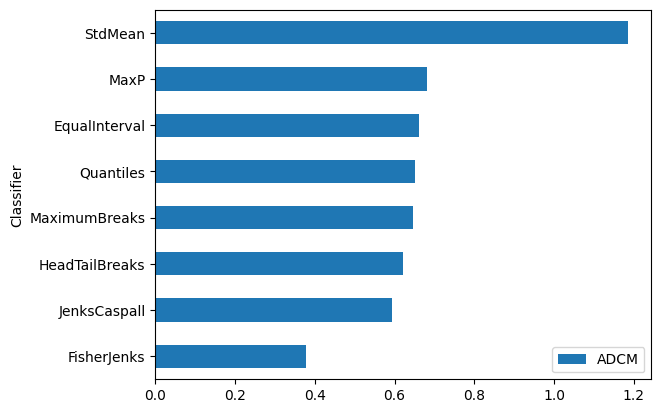

In [185]:
adcms.sort_values('ADCM').plot.barh(x='Classifier')

Let's save the best strategy:

In [186]:
Africa_8857['liters_pure_alcohol_ranking_FJ5'] = fj5.yb

In [187]:
# there you are
Africa_8857[['liters_pure_alcohol_ranking','liters_pure_alcohol_ranking_FJ5']].head(20)

,liters_pure_alcohol_ranking,liters_pure_alcohol_ranking_FJ5
2,0.003687,0
7,0.080000,2
13,0.084225,2
20,0.008621,0
27,0.042842,1
30,0.003395,0
32,0.076533,2
33,0.003478,0
36,0.043511,1
37,0.001040,0


We could create a copy of the bins to add labels:

In [188]:
# renaming
newLabelsForLevels={0:"0_VeryLow", 1:"1_Low", 2:"2_Middle", 3:"3_High", 4:"4_VeryHigh"}

Africa_8857['liters_pure_alcohol_ranking_FJ5_cat']=Africa_8857.loc[:,'liters_pure_alcohol_ranking_FJ5'].replace(newLabelsForLevels)

# we have
Africa_8857[['liters_pure_alcohol_ranking','liters_pure_alcohol_ranking_FJ5','liters_pure_alcohol_ranking_FJ5_cat']].head(20)

,liters_pure_alcohol_ranking,liters_pure_alcohol_ranking_FJ5,liters_pure_alcohol_ranking_FJ5_cat
2,0.003687,0,0_VeryLow
7,0.080000,2,2_Middle
13,0.084225,2,2_Middle
20,0.008621,0,0_VeryLow
27,0.042842,1,1_Low
30,0.003395,0,0_VeryLow
32,0.076533,2,2_Middle
33,0.003478,0,0_VeryLow
36,0.043511,1,1_Low
37,0.001040,0,0_VeryLow


We are ready for a discrete choropleth:

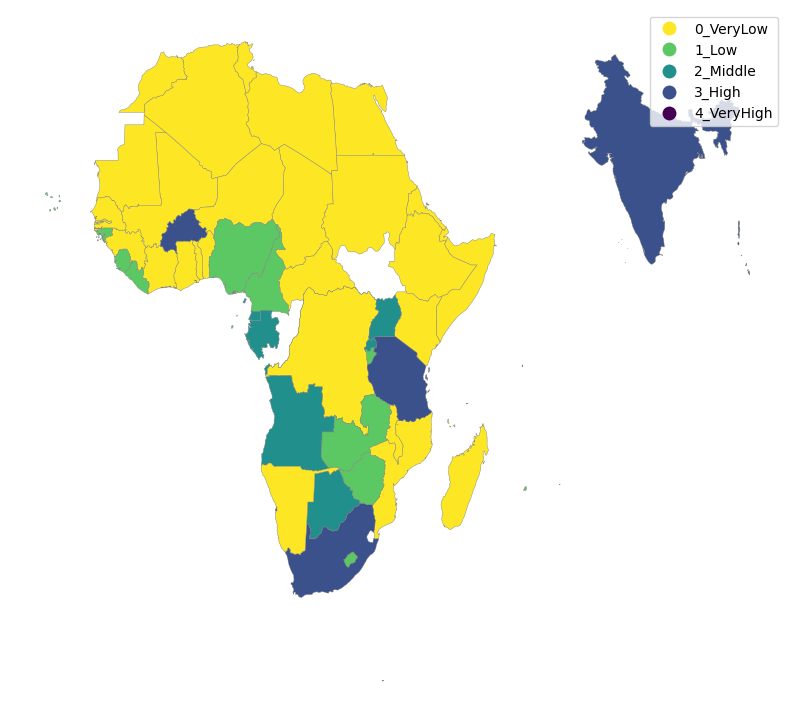

In [189]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, figsize=(10, 10))
Africa_8857.plot(column='liters_pure_alcohol_ranking_FJ5_cat', # variable to plot
                 cmap='viridis_r', # set of colors
                 categorical=True, # can be interpreted as category
                 edgecolor='grey', # border color
                 linewidth=0.3, # width of border
                 legend=True, # need a legend?
                 ax=ax
       )

ax.set_axis_off()

# Saving

Let's save this maps for R.

In [190]:
## Good practice to refresh your memory

## Find only GeoDataFrames in the current session
geodataframe_list = [var for var in globals() if isinstance(globals()[var], gpd.GeoDataFrame)]

print("List of GeoDataFrames in memory:")
for name in geodataframe_list:
    print(name)

List of GeoDataFrames in memory:
countries
_3
theMapAndData
Africa
Africa_dots
_34
Africa_8857
Africa_dots_8857
Africa_8857_centroids
_49
_50
_54
Africa_8857_centroids_out
Africa_8857_centroids_no_out
_73
_104
_118
_119
_128
_159
_173
_174


These are the ones needed in R:

In [191]:
# for choropleth and base map
Africa_8857.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 53 entries, 2 to 186
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   name                                 53 non-null     object  
 1   geometry                             53 non-null     geometry
 2   slug                                 53 non-null     object  
 3    liters of pure alcohol              53 non-null     float64 
 4   date_of_information                  53 non-null     int64   
 5   ranking                              53 non-null     int64   
 6   region                               53 non-null     object  
 7   liters_pure_alcohol_ranking          53 non-null     float64 
 8   liters_pure_alcohol_ranking_FJ5      53 non-null     int64   
 9   liters_pure_alcohol_ranking_FJ5_cat  53 non-null     object  
dtypes: float64(2), geometry(1), int64(3), object(4)
memory usage: 4.6+ KB


In [192]:
# for DDMs
Africa_dots_8857.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   geometry  132 non-null    geometry
dtypes: geometry(1)
memory usage: 1.2 KB


In [193]:
# for PSMs
Africa_8857_centroids.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 53 entries, 2 to 186
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   name                             53 non-null     object  
 1   geometry                         53 non-null     geometry
 2   slug                             53 non-null     object  
 3    liters of pure alcohol          53 non-null     float64 
 4   date_of_information              53 non-null     int64   
 5   ranking                          53 non-null     int64   
 6   region                           53 non-null     object  
 7   size                             53 non-null     float64 
 8    liters of pure alcohol_outlier  53 non-null     int64   
dtypes: float64(2), geometry(1), int64(3), object(3)
memory usage: 4.1+ KB


In [194]:
# for PSMs
Africa_8857_centroids_out.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 0 entries
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   name                             0 non-null      object  
 1   geometry                         0 non-null      geometry
 2   slug                             0 non-null      object  
 3    liters of pure alcohol          0 non-null      float64 
 4   date_of_information              0 non-null      int64   
 5   ranking                          0 non-null      int64   
 6   region                           0 non-null      object  
 7   size                             0 non-null      float64 
 8    liters of pure alcohol_outlier  0 non-null      int64   
dtypes: float64(2), geometry(1), int64(3), object(3)
memory usage: 0.0+ bytes


In [195]:
# for PSMs
Africa_8857_centroids_no_out.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 53 entries, 2 to 186
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   name                             53 non-null     object  
 1   geometry                         53 non-null     geometry
 2   slug                             53 non-null     object  
 3    liters of pure alcohol          53 non-null     float64 
 4   date_of_information              53 non-null     int64   
 5   ranking                          53 non-null     int64   
 6   region                           53 non-null     object  
 7   size                             53 non-null     float64 
 8    liters of pure alcohol_outlier  53 non-null     int64   
dtypes: float64(2), geometry(1), int64(3), object(3)
memory usage: 4.1+ KB


The file **africa_8857.gpkg** will keep all those maps as layers!

In [196]:
Africa_8857.to_file("africa_8857.gpkg",driver='GPKG',layer='continent')
Africa_dots_8857.to_file("africa_8857.gpkg",driver='GPKG',layer='population_ddm')
Africa_8857_centroids.to_file("africa_8857.gpkg",driver='GPKG',layer='population_psm')
Africa_8857_centroids_out.to_file("africa_8857.gpkg",driver='GPKG',layer='outlier_population_psm')
Africa_8857_centroids_no_out.to_file("africa_8857.gpkg",driver='GPKG',layer='no_outlier_population_psm')